<a href="https://colab.research.google.com/github/PrajwalUnaik/100daysofcode__python/blob/main/Excersise_DA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [13]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

alphas = np.logspace(-3, 1, 50)  # Adjusted alpha range
coefs = []
mse_train = []
mse_test = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=50000, random_state=42)  # Increased max_iter
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    mse_train.append(mean_squared_error(y_train, lasso.predict(X_train)))
    mse_test.append(mean_squared_error(y_test, lasso.predict(X_test)))



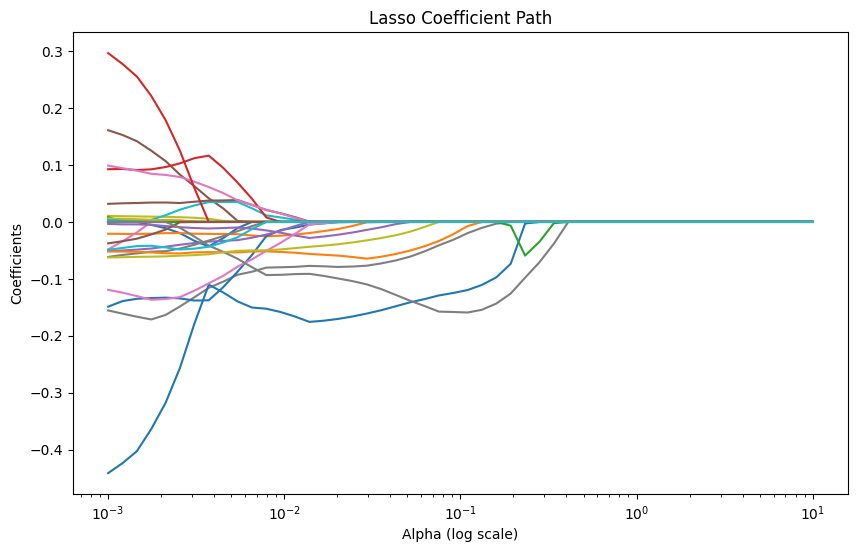

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Coefficients")
plt.title("Lasso Coefficient Path")
plt.show()

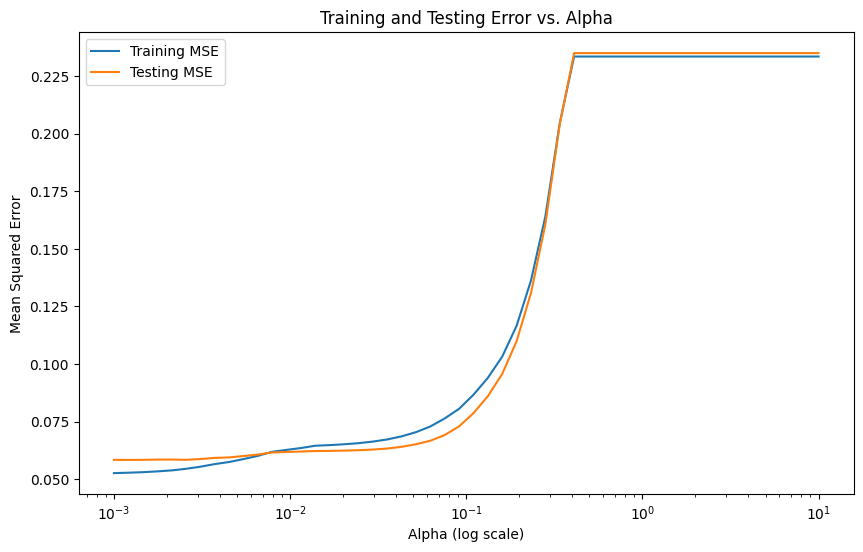

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label="Training MSE")
plt.plot(alphas, mse_test, label="Testing MSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Testing Error vs. Alpha")
plt.show()

In [17]:

optimal_alpha = alphas[np.argmin(mse_test)]
lasso_optimal = Lasso(alpha=optimal_alpha, max_iter=10000, random_state=42)
lasso_optimal.fit(X_train, y_train)

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Training R^2: {lasso_optimal.score(X_train, y_train)}")
print(f"Testing R^2: {lasso_optimal.score(X_test, y_test)}")

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso_optimal.coef_
})
significant_features = coef_df[coef_df["Coefficient"] != 0]
print("Significant Features:")
print(significant_features)


Optimal Alpha: 0.0012067926406393288
Training R^2: 0.7737504798453051
Testing R^2: 0.7516022256928188
Significant Features:
                    Feature  Coefficient
1              mean texture    -0.021015
5          mean compactness     0.152870
6            mean concavity    -0.034056
7       mean concave points    -0.161092
8             mean symmetry     0.010102
10             radius error    -0.139102
11            texture error     0.003958
13               area error     0.093122
14         smoothness error    -0.050093
15        compactness error     0.032767
16          concavity error     0.094485
17     concave points error    -0.057970
18           symmetry error     0.005602
19  fractal dimension error     0.001751
20             worst radius    -0.423865
21            worst texture    -0.052079
23               worst area     0.277614
24         worst smoothness    -0.004209
25        worst compactness    -0.033835
26          worst concavity    -0.124269
28           wo